<a href="https://colab.research.google.com/github/stefanny84/CP1---SERS/blob/main/CP1_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Alunas:***

Letícia Gabrielle Andrade Temoteo, **563985**

Stefanny Brum dos Santos, **566216**

In [ ]:
#1. Carregue o dataset e exiba as 10 primeiras linhas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/household_power_consumption.csv', sep=';', low_memory=False)
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [ ]:
''' 2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

Global_active_power (kW) = o que você realmente consome e paga.
Global_reactive_power (kVAR) = o "custo oculto" do magnetismo/capacitância no sistema, que não faz trabalho
mas pode prejudicar a eficiência. '''

' 2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.\n\nGlobal_active_power (kW) = o que você realmente consome e paga.\nGlobal_reactive_power (kVAR) = o "custo oculto" do magnetismo/capacitância no sistema, que não faz trabalho\nmas pode prejudicar a eficiência. '

In [ ]:
# 3. Verifique se existem valores ausentes no dataset. Quantifique-os.
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,1
Global_reactive_power,1
Voltage,1
Global_intensity,1
Sub_metering_1,1
Sub_metering_2,1
Sub_metering_3,7


In [ ]:
#4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['DayOfWeek'] = df['Date'].dt.day_name()

display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


In [ ]:
#5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.

df_2007 = df[df['Date'].dt.year == 2007].copy()
df_2007['Global_active_power'] = pd.to_numeric(df_2007['Global_active_power'], errors='coerce')
df_2007.dropna(subset=['Global_active_power'], inplace=True)

daily_mean_power_2007 = df_2007.groupby('Date')['Global_active_power'].mean()

overall_daily_mean_power_2007 = daily_mean_power_2007.mean()

print(f'A média de consumo diário de Global_active_power em 2007 é: {overall_daily_mean_power_2007:.2f}')

A média de consumo diário de Global_active_power em 2007 é: 1.53


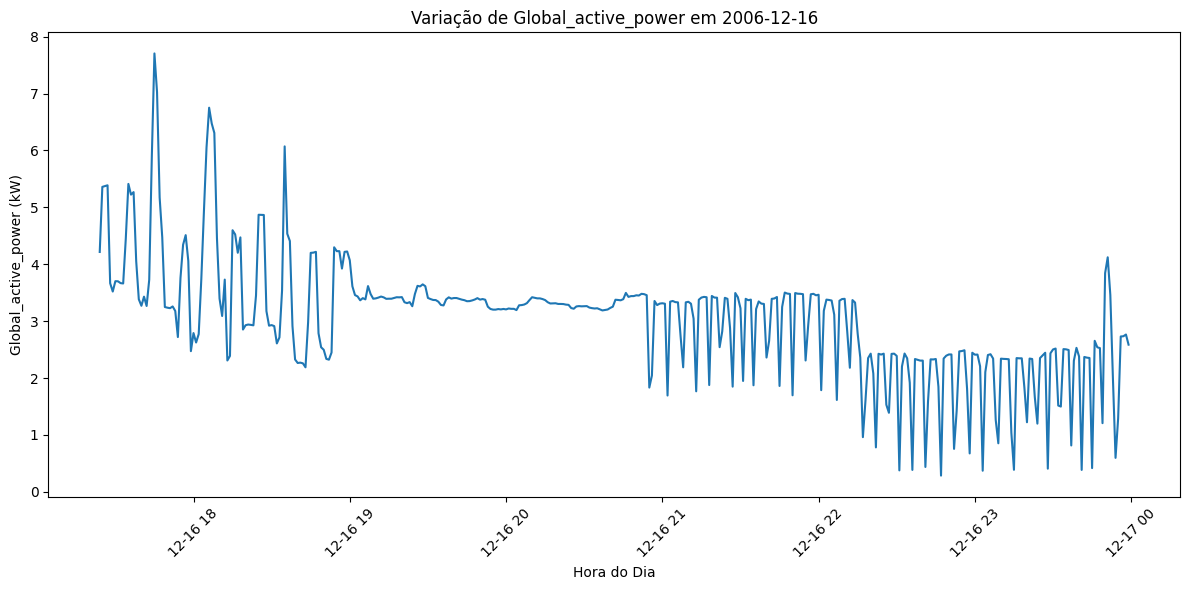

In [ ]:
#6.Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.

plot_date = '2006-12-16'

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

df_single_day = df[df['Date'].dt.strftime('%Y-%m-%d') == plot_date].copy()

df_single_day['Global_active_power'] = pd.to_numeric(df_single_day['Global_active_power'], errors='coerce')
df_single_day.dropna(subset=['Global_active_power'], inplace=True)

df_single_day['DateTime'] = pd.to_datetime(df_single_day['Date'].dt.strftime('%Y-%m-%d') + ' ' + df_single_day['Time'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.lineplot(x='DateTime', y='Global_active_power', data=df_single_day)
plt.title(f'Variação de Global_active_power em {plot_date}')
plt.xlabel('Hora do Dia')
plt.ylabel('Global_active_power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

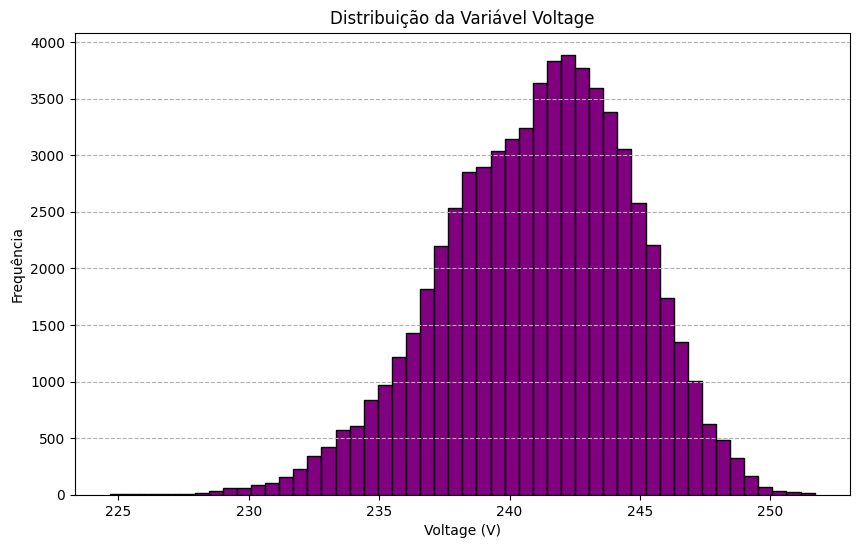

In [ ]:
#7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

df.dropna(subset=['Voltage'], inplace=True)

plt.figure(figsize=(10, 6))
plt.hist(df['Voltage'], bins=50, edgecolor='black', color='purple')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequência')
plt.title('Distribuição da Variável Voltage')
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
#8. Calcule o consumo médio por mês em todo o período disponível no dataset.

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df.dropna(subset=['Global_active_power'], inplace=True)
df['Meses'] = df['Date'].dt.to_period('M')
monthly_mean_power = df.groupby('Meses')['Global_active_power'].mean()

print("Consumo médio por mês:\n")
print(monthly_mean_power)

Consumo médio por mês:

Meses
2006-12    1.901295
2007-01    1.538289
Freq: M, Name: Global_active_power, dtype: float64


In [ ]:
# 9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

daily_power_consumption = df.groupby('Date')['Global_active_power'].sum()

day_max_consumption = daily_power_consumption.idxmax()
max_consumption_value = daily_power_consumption.max()

print(f"O dia com maior consumo de energia ativa global foi {day_max_consumption.strftime('%d-%m-%Y')} com um consumo total de {max_consumption_value:.2f} kW.")

O dia com maior consumo de energia ativa global foi 23-12-2006 com um consumo total de 4773.39 kW.


In [ ]:
#10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.

df['Dias'] = df['Date'].dt.day_name()
semana_mean_power = df.groupby('Dias')['Global_active_power'].mean()

print("Consumo médio de energia ativa global por dia da semana:\n")
print(semana_mean_power)

Consumo médio de energia ativa global por dia da semana:

Dias
Friday       1.480185
Monday       1.612018
Saturday     2.063854
Sunday       2.122204
Thursday     1.472757
Tuesday      1.349790
Wednesday    1.476725
Name: Global_active_power, dtype: float64


In [ ]:
#11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

correlacao_power_reactive = df['Global_active_power'].corr(df['Global_reactive_power'])
correlacao_power_voltage = df['Global_active_power'].corr

print(correlacao_power_reactive)
print(correlacao_power_voltage)

0.2389126007279369
<bound method Series.corr of 0        4.216
1        5.360
2        5.374
3        5.388
4        3.666
         ...  
64621    0.828
64622    0.824
64623    0.824
64624    0.796
64625    0.752
Name: Global_active_power, Length: 64620, dtype: float64>


In [ ]:
#12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3

df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

print(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']])

       Sub_metering_1  Sub_metering_2  Sub_metering_3  Total_Sub_metering
0                 0.0             1.0            17.0                18.0
1                 0.0             1.0            16.0                17.0
2                 0.0             2.0            17.0                19.0
3                 0.0             1.0            17.0                18.0
4                 0.0             1.0            17.0                18.0
...               ...             ...             ...                 ...
64621             0.0             0.0             0.0                 0.0
64622             0.0             0.0             0.0                 0.0
64623             0.0             0.0             0.0                 0.0
64624             0.0             0.0             0.0                 0.0
64625             0.0             0.0             0.0                 0.0

[64620 rows x 4 columns]


In [ ]:
#13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

mean_power = df.groupby('Meses')['Global_active_power'].mean()
mean_submetering = df.groupby('Meses')['Total_Sub_metering'].mean()

print(mean_power)
print(mean_submetering)

Meses
2006-12    1.901295
2007-01    1.538289
Freq: M, Name: Global_active_power, dtype: float64
Meses
2006-12    10.873181
2007-01    10.249367
Freq: M, Name: Total_Sub_metering, dtype: float64


In [ ]:
#14. Faça um gráfico de série temporal do Voltage para o ano de 2008

df_2008 = df[df['Date'].dt.year == 2008].copy()
df_2008 = df_2008.dropna(subset=['Voltage'])

if df_2008.empty:
    print("Sem dados válidos para 2008 após limpeza.")
else:
    plt.figure(figsize=(12, 6))
    plt.plot(df_2008['Date'], df_2008['Voltage'], linewidth=0.6)
    plt.xlabel('Data')
    plt.ylabel('Tensão (V)')
    plt.title('Série Temporal da Tensão em 2008')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Sem dados válidos para 2008 após limpeza.


In [ ]:
#15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

meses_verao_list = [6, 7, 8]
meses_inverno_list = [12, 1, 2]

# Extrai o mês
df['Month'] = df['Date'].dt.month

# Filtra verão e inverno
df_verao = df[df['Month'].isin(meses_verao_list)].copy()
df_inverno = df[df['Month'].isin(meses_inverno_list)].copy()

# Calcula consumo médio
average_verao_consumption = df_verao['Global_active_power'].mean()
average_inverno_consumption = df_inverno['Global_active_power'].mean()

print(f"Consumo médio de energia ativa global no verão: {average_verao_consumption:.2f} kW")
print(f"Consumo médio de energia ativa global no inverno: {average_inverno_consumption:.2f} kW")


Consumo médio de energia ativa global no verão: nan kW
Consumo médio de energia ativa global no inverno: 1.66 kW


Distribuição da base completa:
count    1.119778e+06
mean     1.123225e+00
std      1.132820e+00
min      7.600000e-02
25%      2.920000e-01
50%      5.760000e-01
75%      1.562000e+00
max      1.067000e+01
Name: Global_active_power, dtype: float64

Distribuição da amostra de 1%:
count    11198.000000
mean         1.134094
std          1.121311
min          0.078000
25%          0.292000
50%          0.618000
75%          1.584000
max          7.998000
Name: Global_active_power, dtype: float64


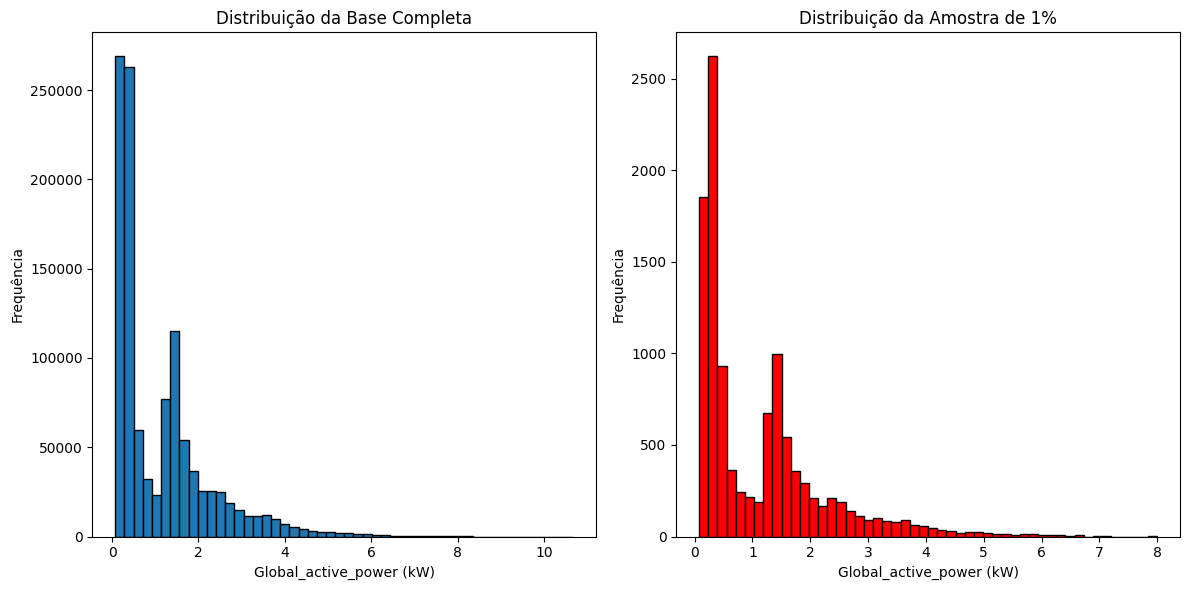

In [ ]:
#16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.

df_sample = df.sample(frac=0.01, random_state=42)

print("Distribuição da base completa:")
print(df['Global_active_power'].describe())

print("\nDistribuição da amostra de 1%:")
print(df_sample['Global_active_power'].describe())

# Colocamos as comparações em dois histogramas para facilitar a visualização
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Global_active_power'].dropna(), bins=50, edgecolor='black')
plt.title('Distribuição da Base Completa')
plt.xlabel('Global_active_power (kW)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(df_sample['Global_active_power'].dropna(), bins=50, edgecolor='black', color='red')
plt.title('Distribuição da Amostra de 1%')
plt.xlabel('Global_active_power (kW)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [ ]:
#17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['Global_active_power'] = scaler.fit_transform(df[['Global_active_power']])

print(df['Global_active_power'])

0          0.390787
1          0.498773
2          0.500094
3          0.501416
4          0.338871
             ...   
1123882    0.021899
1123883    0.021710
1123884    0.030017
1123885    0.023976
1123886    0.020011
Name: Global_active_power, Length: 1119778, dtype: float64


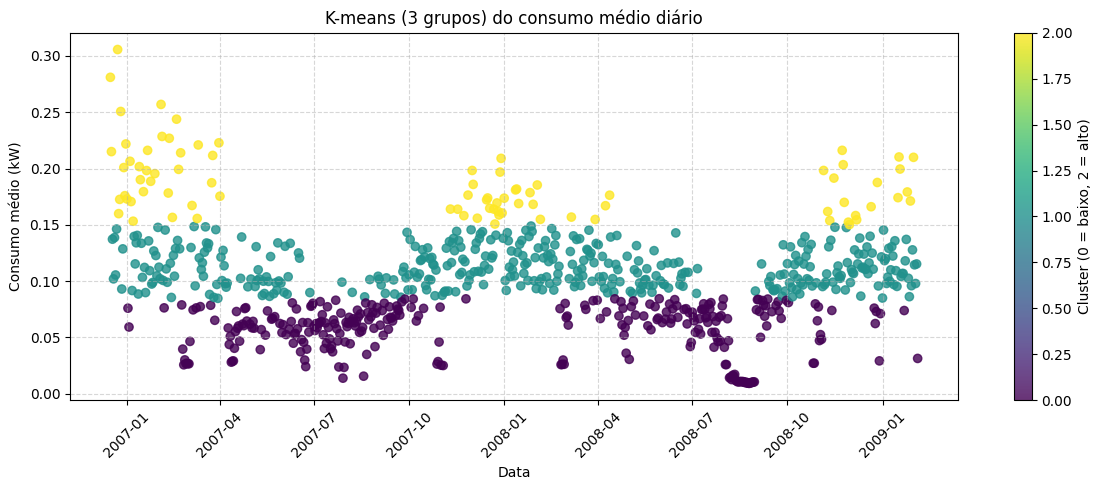

/tmp/ipython-input-1864940959.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dados_box, labels=['Cluster 0', 'Cluster 1', 'Cluster 2'], showfliers=False)


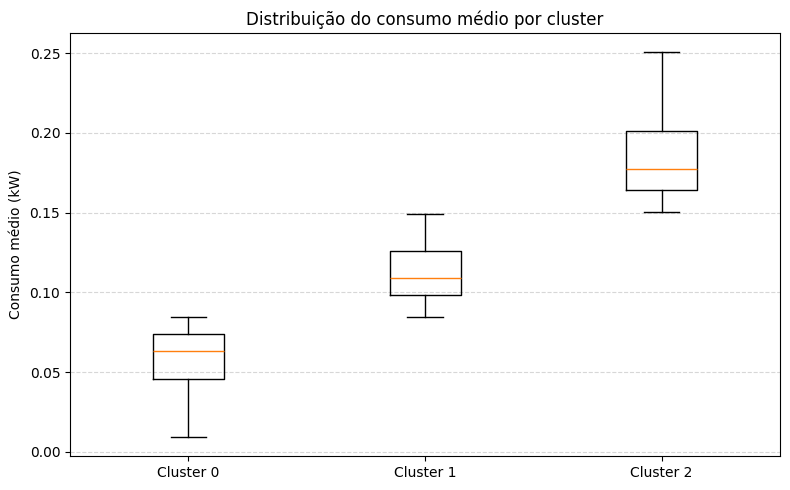


Interpretação sugerida:
- Cluster 0: dias de BAIXO consumo médio (centro ~ 0.06 kW) — provável rotina mais leve.
- Cluster 1: dias de CONSUMO INTERMEDIÁRIO (centro ~ 0.11 kW) — padrão típico do dia a dia.
- Cluster 2: dias de ALTO consumo médio (centro ~ 0.19 kW) — eventos/picos (ex.: mais eletrodomésticos, clima extremo, visitas).


In [ ]:
#18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados

from sklearn.cluster import KMeans

df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Ordena clusters pelo centro (do menor consumo ao maior) para facilitar leitura
ordem = np.argsort(centros)
daily['Cluster'] = daily['Cluster'].map(mapa)
centros_ordenados = np.sort(centros)

# Scatter ao longo do tempo
plt.figure(figsize=(12, 5))
plt.scatter(pd.to_datetime(daily['Dia']), daily['Consumo_medio_kW'],
            c=daily['Cluster'], cmap='viridis', alpha=0.8)
plt.colorbar(label='Cluster (0 = baixo, 2 = alto)')
plt.title('K-means (3 grupos) do consumo médio diário')
plt.xlabel('Data')
plt.ylabel('Consumo médio (kW)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot por cluster
plt.figure(figsize=(8, 5))
# Organiza dados por cluster para o boxplot
dados_box = [daily.loc[daily['Cluster']==i, 'Consumo_medio_kW'] for i in range(3)]
plt.boxplot(dados_box, labels=['Cluster 0', 'Cluster 1', 'Cluster 2'], showfliers=False)
plt.title('Distribuição do consumo médio por cluster')
plt.ylabel('Consumo médio (kW)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Interpretação
print("\nInterpretação:")
print("- Cluster 0: dias de BAIXO consumo médio (centro ~ {:.2f} kW) — "
      "provável rotina mais leve.".format(centros_ordenados[0]))
print("- Cluster 1: dias de CONSUMO INTERMEDIÁRIO (centro ~ {:.2f} kW) — "
      "padrão típico do dia a dia.".format(centros_ordenados[1]))
print("- Cluster 2: dias de ALTO consumo médio (centro ~ {:.2f} kW) — "
      "eventos/picos (ex.: mais eletrodomésticos, clima extremo, visitas).".format(centros_ordenados[2]))

In [ ]:
#19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.


In [ ]:
#20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo

In [ ]:
#20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data: Drop rows with missing values in the relevant columns
df_regression = df[['Global_active_power', 'Global_intensity']].dropna()

# Define features (X) and target (y)
X = df_regression[['Global_intensity']]
y = df_regression['Global_active_power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optionally, visualize the regression results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('Linear Regression: Global_intensity vs Global_active_power')
plt.legend()
plt.grid(True)
plt.show()